<a href="https://colab.research.google.com/github/MayraShaday/Aprendizaje-refuerzo-Q-learning./blob/main/Q_Learning_GridWorld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Entrenando Q-Learning... (esto puede tardar unos segundos)**

Ep 0/1000 - reward: 95.1 - eps: 0.995
Ep 100/1000 - reward: 99.1 - eps: 0.603
Ep 200/1000 - reward: 99.0 - eps: 0.365
Ep 300/1000 - reward: 99.3 - eps: 0.221
Ep 400/1000 - reward: 99.3 - eps: 0.134
Ep 500/1000 - reward: 99.3 - eps: 0.081
Ep 600/1000 - reward: 99.3 - eps: 0.049
Ep 700/1000 - reward: 99.3 - eps: 0.030
Ep 800/1000 - reward: 99.3 - eps: 0.018
Ep 900/1000 - reward: 99.3 - eps: 0.011


**Entrenamiento completado**

Q shape: (25, 4)


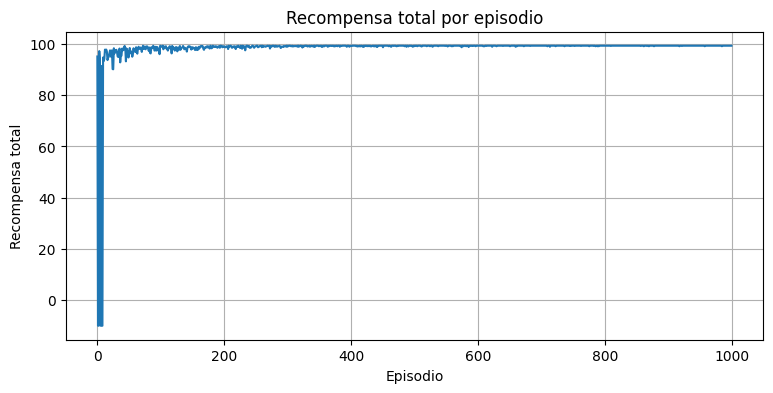

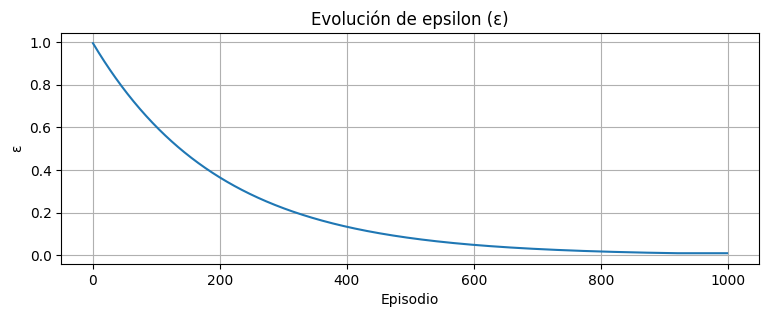

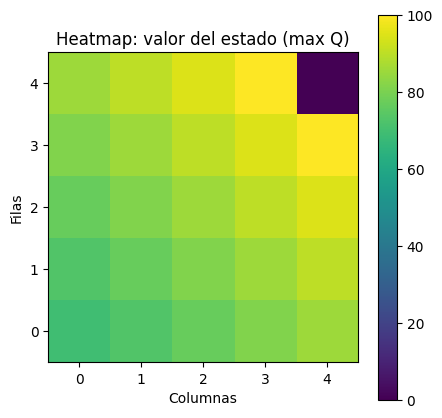

Política (grid):
→ → → ↓ ↓
→ → → → ↓
→ → → → ↓
→ → → → ↓
→ → → → G
Trayectoria (posiciones): [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)]


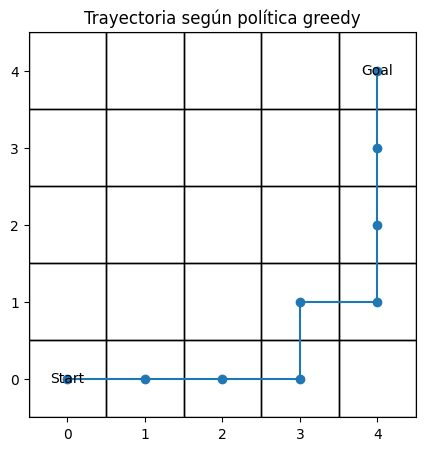


**Consejos para experimentar**
- Cambia `alpha` (tasa de aprendizaje), `gamma` (descuento) y `epsilon` (exploración) y vuelve a entrenar.
- Reduce `n_rows,n_cols` o agrega obstáculos: define una lista de estados "obstáculo" que no se puedan visitar (o que penalicen más).
- Aumenta `n_episodes` para ver convergencia más estable.
- Guarda las figuras (`plt.savefig(...)`) si necesitas imágenes para el video.


In [1]:
# Q-Learning didáctico para GridWorld 5x5.
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# ------------------------------
# Parámetros y configuración
# ------------------------------
np.random.seed(0)
random.seed(0)

n_rows, n_cols = 5, 5
n_states = n_rows * n_cols
actions = [0,1,2,3]  # 0: up, 1: right, 2: down, 3: left

# Estados de inicio y objetivo (cambia si quieres)
def s_from(r, c): return r * n_cols + c
def pos_from_state(s): return divmod(s, n_cols)

start_state = s_from(0, 0)
goal_state  = s_from(4, 4)

# ------------------------------
# Dinámica del GridWorld
# ------------------------------
def step(s, a):
    """Dada un estado s y una acción a, devuelve el siguiente estado s2."""
    r, c = pos_from_state(s)
    if a == 0:        # up
        r = max(0, r-1)
    elif a == 1:      # right
        c = min(n_cols-1, c+1)
    elif a == 2:      # down
        r = min(n_rows-1, r+1)
    elif a == 3:      # left
        c = max(0, c-1)
    return s_from(r, c)

def reward_for(s):
    """Recompensa simple: +100 si es la meta, -0.1 por paso."""
    return 100.0 if s == goal_state else -0.1

# ------------------------------
# Algoritmo Q-Learning
# ------------------------------
def q_learning_train(alpha=0.7, gamma=0.95,
                     epsilon=1.0, eps_min=0.01, eps_decay=0.995,
                     n_episodes=1000, max_steps=100,
                     verbose=False):
    """Entrena Q-Learning y devuelve Q, historial de recompensas y de epsilon."""
    Q = np.zeros((n_states, len(actions)))
    rewards_history = []
    eps_history = []

    for ep in range(n_episodes):
        s = start_state
        total_reward = 0.0
        for t in range(max_steps):
            # epsilon-greedy
            if random.random() < epsilon:
                a = random.choice(actions)
            else:
                a = int(np.argmax(Q[s]))
            s2 = step(s, a)
            r = reward_for(s2)
            total_reward += r

            # actualización Q
            best_next = np.max(Q[s2])
            Q[s, a] += alpha * (r + gamma * best_next - Q[s, a])

            s = s2
            if s == goal_state:
                break

        # Decay de epsilon
        epsilon = max(eps_min, epsilon * eps_decay)

        rewards_history.append(total_reward)
        eps_history.append(epsilon)

        if verbose and (ep % max(1, (n_episodes//10)) == 0):
            print(f"Ep {ep}/{n_episodes} - reward: {total_reward:.1f} - eps: {epsilon:.3f}")

    return Q, rewards_history, eps_history

# ------------------------------
# Ejecutar entrenamiento (ajusta parámetros si quieres)
# ------------------------------
alpha = 0.7
gamma = 0.95
epsilon = 1.0
eps_min = 0.01
eps_decay = 0.995
n_episodes = 1000
max_steps = 100

display(Markdown("**Entrenando Q-Learning... (esto puede tardar unos segundos)**"))
Q, rewards_hist, eps_hist = q_learning_train(alpha=alpha, gamma=gamma,
                                             epsilon=epsilon, eps_min=eps_min,
                                             eps_decay=eps_decay,
                                             n_episodes=n_episodes,
                                             max_steps=max_steps,
                                             verbose=True)
display(Markdown("**Entrenamiento completado**"))
print("Q shape:", Q.shape)

# ------------------------------
# Visualizaciones
# ------------------------------
# 1) Recompensa por episodio
plt.figure(figsize=(9,4))
plt.plot(rewards_hist)
plt.title('Recompensa total por episodio')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.grid(True)
plt.show()

# 2) Evolución de epsilon
plt.figure(figsize=(9,3))
plt.plot(eps_hist)
plt.title('Evolución de epsilon (ε)')
plt.xlabel('Episodio')
plt.ylabel('ε')
plt.grid(True)
plt.show()

# 3) Heatmap: valor del estado = max_a Q(s,a)
state_values = np.max(Q, axis=1).reshape(n_rows, n_cols)
plt.figure(figsize=(5,5))
plt.imshow(state_values, interpolation='nearest')
plt.title('Heatmap: valor del estado (max Q)')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

# 4) Política (flechas) impresa en grid
arrow = {0:'↑',1:'→',2:'↓',3:'←'}
policy = []
for s in range(n_states):
    if s == goal_state:
        policy.append('G')
    else:
        policy.append(arrow[int(np.argmax(Q[s]))])

print("Política (grid):")
for r in range(n_rows):
    row = policy[r*n_cols:(r+1)*n_cols]
    print(' '.join(row))

# 5) Trayectoria greedy siguiendo la política
def run_greedy_policy(Q, start=start_state, max_steps=100):
    s = start
    traj = [pos_from_state(s)]
    for _ in range(max_steps):
        if s == goal_state:
            break
        a = int(np.argmax(Q[s]))
        s = step(s, a)
        traj.append(pos_from_state(s))
    return traj

traj = run_greedy_policy(Q, start=start_state, max_steps=100)
print("Trayectoria (posiciones):", traj)

# Visualizar la trayectoria en el grid
plt.figure(figsize=(5,5))
plt.xlim(-0.5, n_cols-0.5)
plt.ylim(n_rows-0.5, -0.5)
# Dibujar cuadrícula
for r in range(n_rows):
    for c in range(n_cols):
        plt.gca().add_patch(plt.Rectangle((c-0.5, r-0.5), 1, 1, fill=False))
# Trazar trayectoria
xs = [c for r,c in traj]
ys = [r for r,c in traj]
plt.plot(xs, ys, marker='o')
# Etiquetas inicio/goal
sr, sc = pos_from_state(start_state)
gr, gc = pos_from_state(goal_state)
plt.text(sc, sr, 'Start', ha='center', va='center')
plt.text(gc, gr, 'Goal', ha='center', va='center')
plt.title('Trayectoria según política greedy')
plt.gca().invert_yaxis()
plt.show()

# ------------------------------
# Consejos para experimentar (imprime al final)
# ------------------------------
display(Markdown("""
**Consejos para experimentar**
- Cambia `alpha` (tasa de aprendizaje), `gamma` (descuento) y `epsilon` (exploración) y vuelve a entrenar.
- Reduce `n_rows,n_cols` o agrega obstáculos: define una lista de estados "obstáculo" que no se puedan visitar (o que penalicen más).
- Aumenta `n_episodes` para ver convergencia más estable.
"""))